# RATINGS PREDICTION PROJECT

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from collections import defaultdict, Counter
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
Rating=pd.read_csv('Rating_Reviews.csv',encoding='latin-1')
Rating.head()

,Unnamed: 0,Ratings,Full_review
0,0,5,Its an absolute beast if u know what are the n...
1,1,5,This is the best laptop in this range.I reciev...
2,2,5,Good product as used of now.... Everything is ...
3,3,5,AWESOME LAPTOP. It supports many high spec gam...
4,4,4,For that price... it's exceptionally good. Pla...


In [3]:
Rating

,Unnamed: 0,Ratings,Full_review
0,0,5,Its an absolute beast if u know what are the n...
1,1,5,This is the best laptop in this range.I reciev...
2,2,5,Good product as used of now.... Everything is ...
3,3,5,AWESOME LAPTOP. It supports many high spec gam...
4,4,4,For that price... it's exceptionally good. Pla...
...,...,...,...
50985,50985,5,"Good network signal, and very good at this pri..."
50986,50986,3,Tenda N 301 wireless router its not working pr...
50987,50987,1,WAN is not working. Cannot get any internet :'...
50988,50988,5,gud mrng sir...the product was good nd its suc...


In [3]:
#dropping the Unnamed: 0 column
Rating.drop('Unnamed: 0', axis =1, inplace = True)

In [4]:
print('shape = >',Rating.shape)

shape = > (50990, 2)


# Observation:
    There are 50990 rows and 2 columns present in our dataset.

In [5]:
print('Rating counts','\n',Rating.Ratings.value_counts())

Rating counts 
 5    27754
4    10078
1     6605
3     4349
2     2204
Name: Ratings, dtype: int64


# Observation:
    Maximum, 27754 number of ratings present is of 5 star and minimum, 2204 is of 2 star.

In [6]:
def plot_labels(Rating, title=None):
  ds_labels = Rating["Ratings"].value_counts(normalize=True)
  ds_labels.sort_index(inplace=True)
  plt.figure(figsize=(4,3))
  ax = ds_labels.plot(kind="bar")
  ax.set_xlabel("Stars")
  ax.set_ylabel("Ratio")
  if title is not None:
    plt.savefig(title + ".eps")
  plt.show()

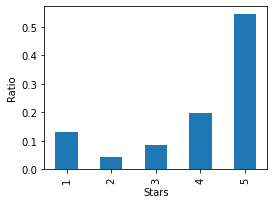

In [7]:
plot_labels(Rating, "stars")

# We can observe that the dataset is imbalanced.

In [8]:
Rating['length']=Rating.Full_review.str.len()
Rating.head()

,Ratings,Full_review,length
0,5,Its an absolute beast if u know what are the n...,500
1,5,This is the best laptop in this range.I reciev...,500
2,5,Good product as used of now.... Everything is ...,271
3,5,AWESOME LAPTOP. It supports many high spec gam...,96
4,4,For that price... it's exceptionally good. Pla...,342


# Here we create another column length based on the length of reviews.

In [9]:
Rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50990 entries, 0 to 50989
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Ratings      50990 non-null  int64 
 1   Full_review  50990 non-null  object
 2   length       50990 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ MB


In [10]:
Rating.isnull().sum()

Ratings        0
Full_review    0
length         0
dtype: int64

<AxesSubplot:>

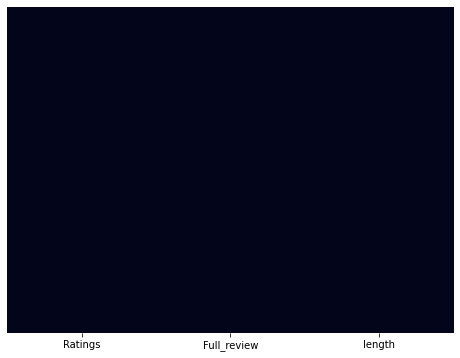

In [11]:
#Visualizing missing values if any through heatmap
plt.figure(figsize=(8,6))
sns.heatmap(Rating.isnull(),yticklabels=False,cbar=False)

# Observation:
    Thus we confirm that there are no missing values present in our dataset.

In [12]:
#convert text to lowercase
Rating['Full_review']=Rating['Full_review'].str.lower()

In [13]:
Rating['Full_review']=Rating['Full_review'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$', 'emailaddress')

Rating['Full_review']=Rating['Full_review'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$', 'webaddress')

Rating['Full_review']=Rating['Full_review'].str.replace(r'£|\$', 'dollers')

Rating['Full_review']=Rating['Full_review'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$', 'phonenumber')

Rating['Full_review']=Rating['Full_review'].str.replace(r'\d+(\.\d+)?', 'numbr')

In [14]:
#remove punctuation
Rating['Full_review']=Rating['Full_review'].str.replace(r'[^\w\d\s]', ' ')

#replace whitespace between terms with a single space
Rating['Full_review']=Rating['Full_review'].str.replace(r'\s+', ' ')

#Remove leading and trailing whitespace
Rating['Full_review']=Rating['Full_review'].str.replace(r'^\s+|\s+?$', '')

In [15]:
Rating.head()

,Ratings,Full_review,length
0,5,its an absolute beast if u know what are the n...,500
1,5,this is the best laptop in this range i reciev...,500
2,5,good product as used of now everything is good...,271
3,5,awesome laptop it supports many high spec game...,96
4,4,for that price it s exceptionally good played ...,342


In [16]:
#Remove stopwords
import string
import nltk
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english') + ['u', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure'])

Rating['Full_review'] = Rating['Full_review'].apply(lambda x: ' '.join(term for term in x.split() if term not in stop_words))

In [17]:
Rating['clean_length'] = Rating.Full_review.str.len()

In [18]:
Rating.head()

,Ratings,Full_review,length,clean_length
0,5,absolute beast know necessary steps follow com...,500,294
1,5,best laptop range recieved late delivery due b...,500,337
2,5,good product used everything good also ssd slo...,271,150
3,5,awesome laptop supports many high spec games l...,96,84
4,4,price exceptionally good played far cry numbr ...,342,254


In [19]:
print('original Review length', Rating.length.sum())
print('clean Review length', Rating.clean_length.sum())

original Review length 3033273
clean Review length 2154473


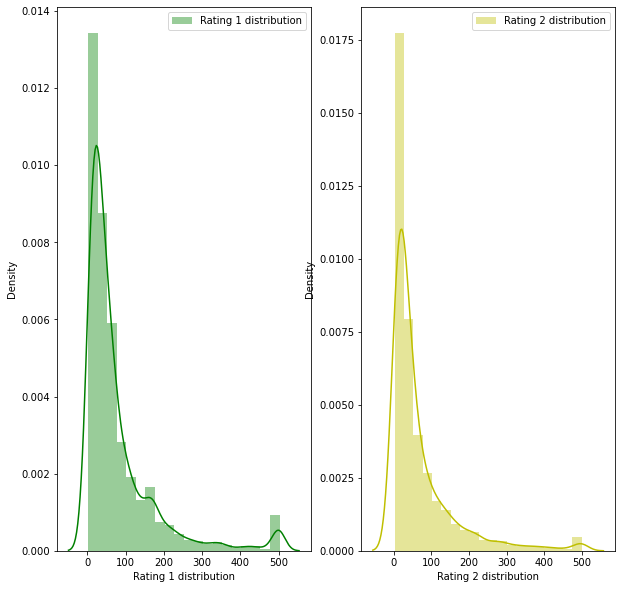

In [20]:
#message distribution before cleaning

f,ax = plt.subplots(1,2,figsize=(10,10))

sns.distplot(Rating[Rating['Ratings']==1]['length'],bins=20,ax=ax[0],label='Rating 1 distribution',color='g')
ax[0].set_xlabel('Rating 1 distribution')
ax[0].legend()

sns.distplot(Rating[Rating['Ratings']==2]['length'],bins=20,ax=ax[1],label='Rating 2 distribution',color='y')
ax[1].set_xlabel('Rating 2 distribution')
ax[1].legend()

plt.show()

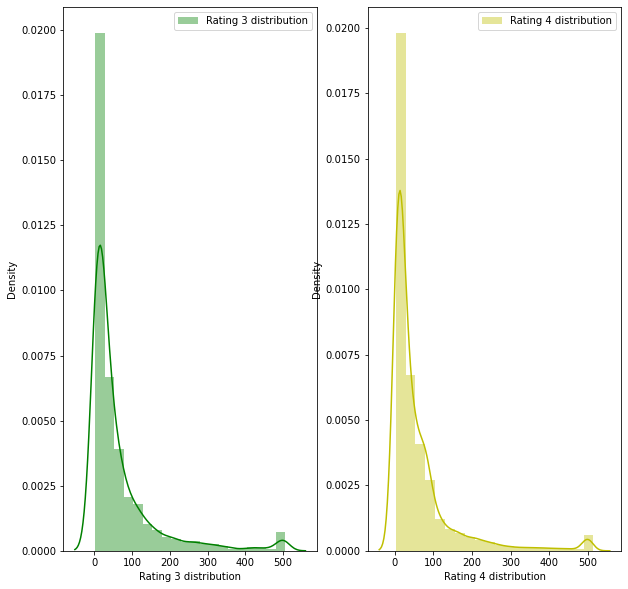

In [21]:
f,ax = plt.subplots(1,2,figsize=(10,10))

sns.distplot(Rating[Rating['Ratings']==3]['length'],bins=20,ax=ax[0],label='Rating 3 distribution',color='g')
ax[0].set_xlabel('Rating 3 distribution')
ax[0].legend()

sns.distplot(Rating[Rating['Ratings']==4]['length'],bins=20,ax=ax[1],label='Rating 4 distribution',color='y')
ax[1].set_xlabel('Rating 4 distribution')
ax[1].legend()

plt.show()

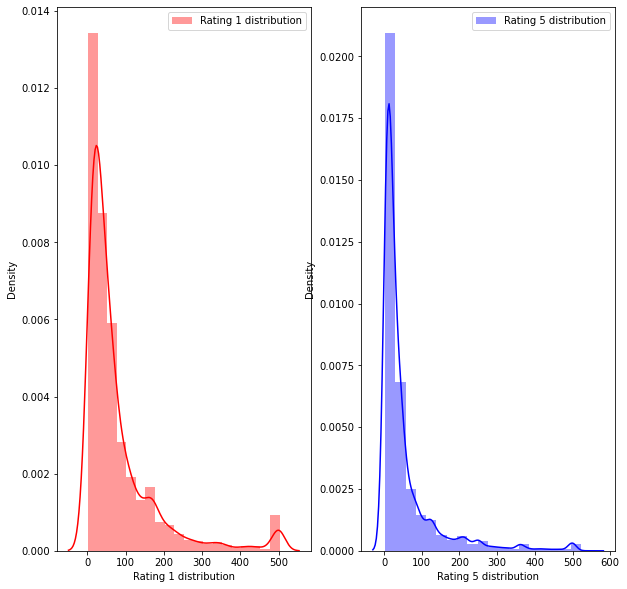

In [22]:
f,ax = plt.subplots(1,2,figsize=(10,10))

sns.distplot(Rating[Rating['Ratings']==1]['length'],bins=20,ax=ax[0],label='Rating 1 distribution',color='r')
ax[0].set_xlabel('Rating 1 distribution')
ax[0].legend()

sns.distplot(Rating[Rating['Ratings']==5]['length'],bins=20,ax=ax[1],label='Rating 5 distribution',color='b')
ax[1].set_xlabel('Rating 5 distribution')
ax[1].legend()

plt.show()

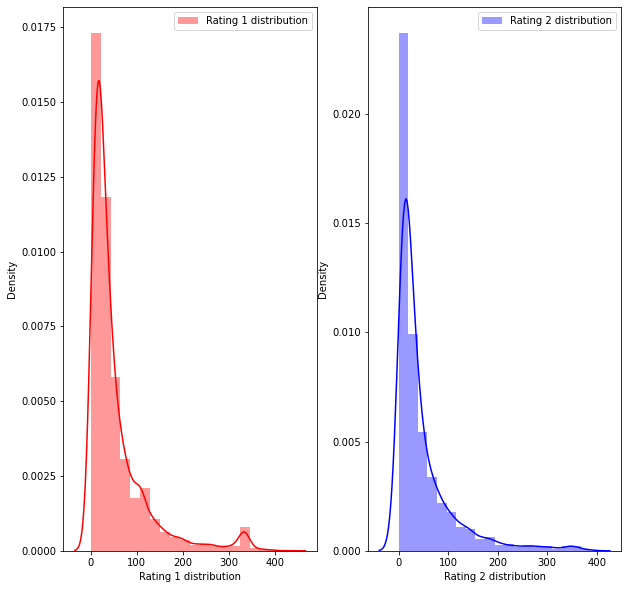

In [23]:
#message distribution after cleaning

f,ax = plt.subplots(1,2,figsize=(10,10))

sns.distplot(Rating[Rating['Ratings']==1]['clean_length'],bins=20,ax=ax[0],label='Rating 1 distribution',color='r')
ax[0].set_xlabel('Rating 1 distribution')
ax[0].legend()

sns.distplot(Rating[Rating['Ratings']==2]['clean_length'],bins=20,ax=ax[1],label='Rating 2 distribution',color='b')
ax[1].set_xlabel('Rating 2 distribution')
ax[1].legend()

plt.show()

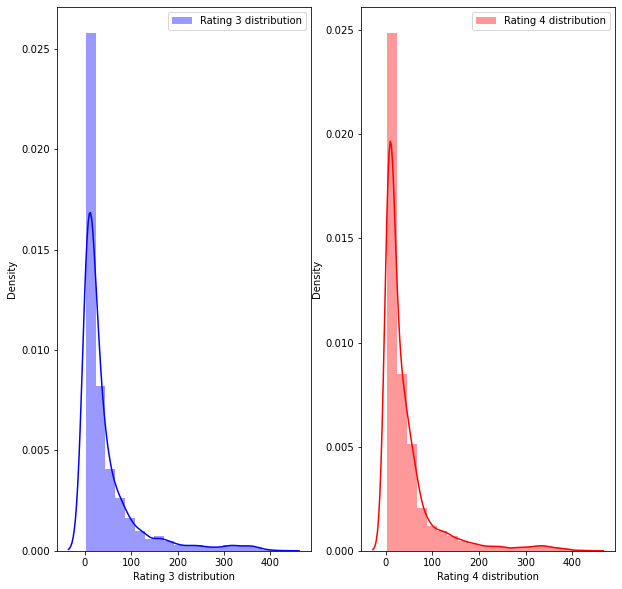

In [24]:
f,ax = plt.subplots(1,2,figsize=(10,10))

sns.distplot(Rating[Rating['Ratings']==3]['clean_length'],bins=20,ax=ax[0],label='Rating 3 distribution',color='b')
ax[0].set_xlabel('Rating 3 distribution')
ax[0].legend()

sns.distplot(Rating[Rating['Ratings']==4]['clean_length'],bins=20,ax=ax[1],label='Rating 4 distribution',color='r')
ax[1].set_xlabel('Rating 4 distribution')
ax[1].legend()

plt.show()

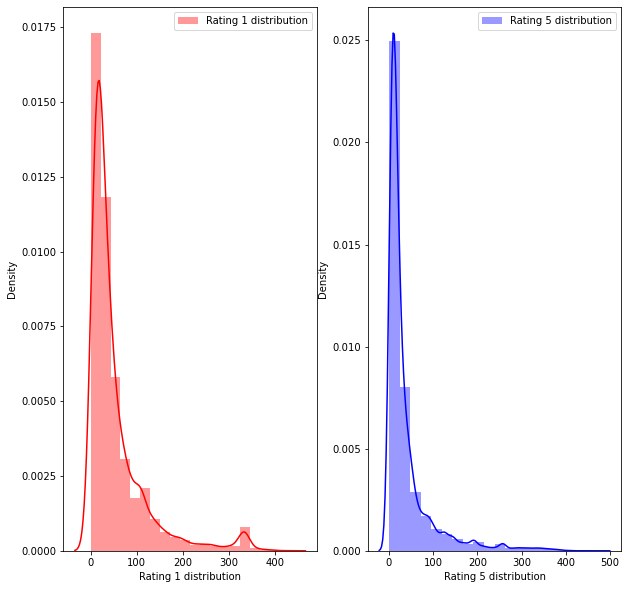

In [25]:
f,ax = plt.subplots(1,2,figsize=(10,10))

sns.distplot(Rating[Rating['Ratings']==1]['clean_length'],bins=20,ax=ax[0],label='Rating 1 distribution',color='r')
ax[0].set_xlabel('Rating 1 distribution')
ax[0].legend()

sns.distplot(Rating[Rating['Ratings']==5]['clean_length'],bins=20,ax=ax[1],label='Rating 5 distribution',color='b')
ax[1].set_xlabel('Rating 5 distribution')
ax[1].legend()

plt.show()

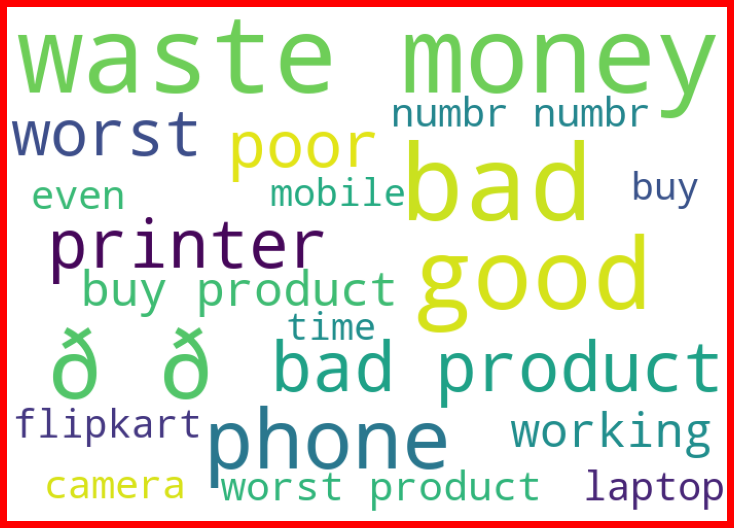

In [26]:
#getting sense of review Loud words in Rating 1
from wordcloud import WordCloud

Rating1=Rating['Full_review'][Rating['Ratings']==1]

spam_cloud = WordCloud(width=700,height=500,background_color='white',max_words=20).generate(' '.join(Rating1))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

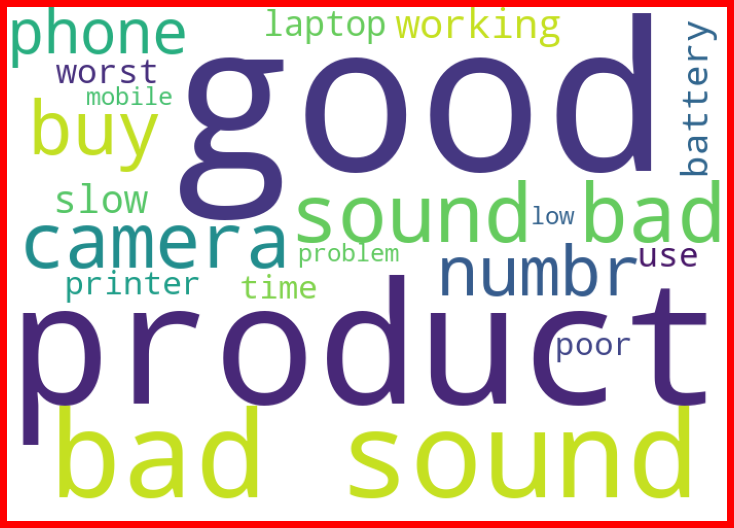

In [27]:
#getting sense of review Loud words in Rating 2

Rating2=Rating['Full_review'][Rating['Ratings']==2]

spam_cloud = WordCloud(width=700,height=500,background_color='white',max_words=20).generate(' '.join(Rating2))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

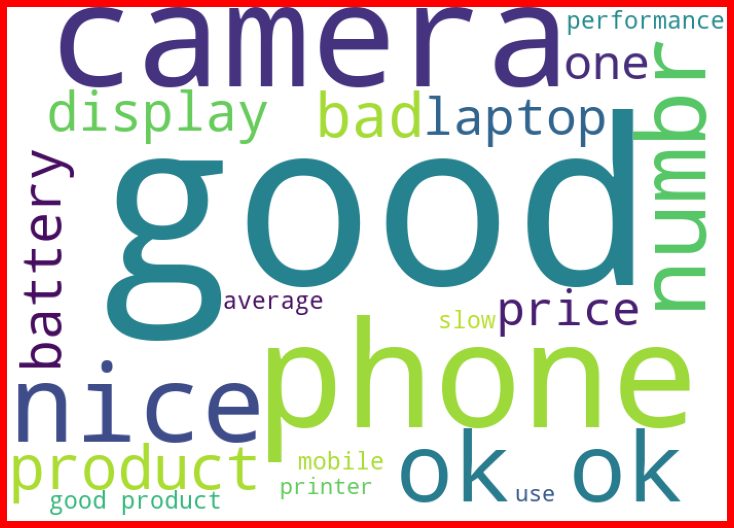

In [28]:
#getting sense of review Loud words in Rating 3

Rating3=Rating['Full_review'][Rating['Ratings']==3]

spam_cloud = WordCloud(width=700,height=500,background_color='white',max_words=20).generate(' '.join(Rating3))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

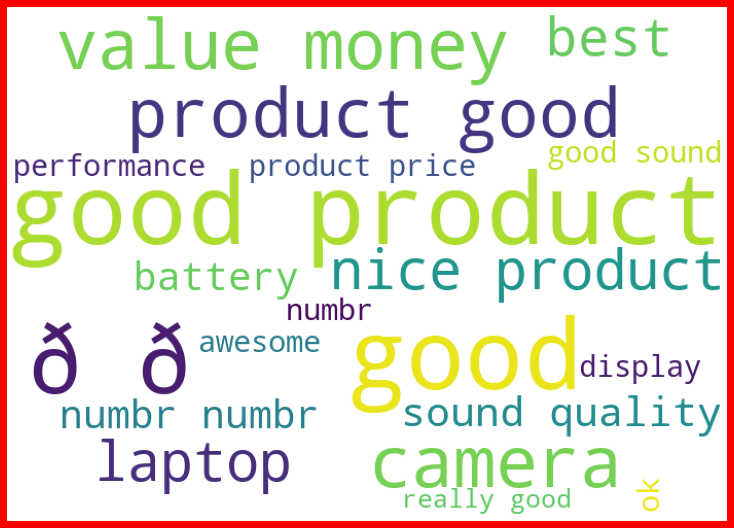

In [29]:
#getting sense of review Loud words in Rating 4

Rating4=Rating['Full_review'][Rating['Ratings']==4]

spam_cloud = WordCloud(width=700,height=500,background_color='white',max_words=20).generate(' '.join(Rating4))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

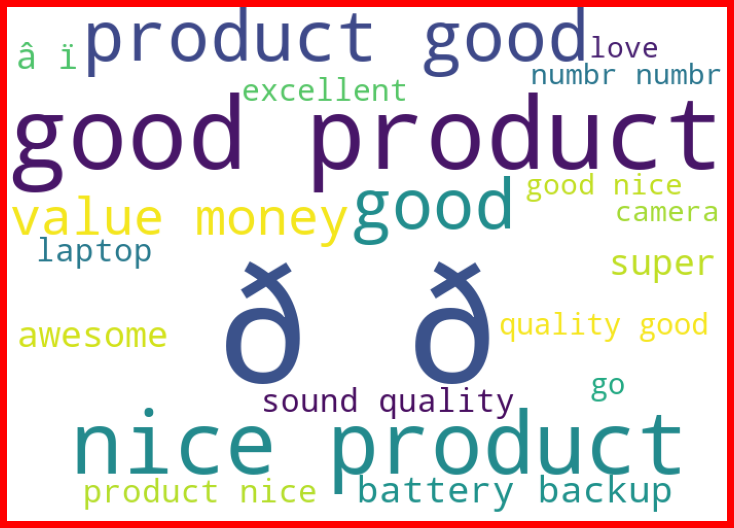

In [30]:
#getting sense of review Loud words in Rating 5

Rating5=Rating['Full_review'][Rating['Ratings']==5]

spam_cloud = WordCloud(width=700,height=500,background_color='white',max_words=20).generate(' '.join(Rating5))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf_vec=TfidfVectorizer()
feature1=tf_vec.fit_transform(Rating['Full_review'])

In [32]:
x=feature1

In [33]:
y=Rating['Ratings']

In [34]:
#splitting the data into training and testing data

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=9)

In [35]:
# Oversample and plot imbalanced dataset with SMOTE
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE


# transform the dataset
os=SMOTE(sampling_strategy = {1: 22132, 2: 22132, 3: 22132, 4: 22132, 5: 22132})
x_train_ns,y_train_ns=os.fit_resample(x_train,y_train)

print("The number of classes before fit{}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_ns)))

The number of classes before fitCounter({5: 22132, 4: 8096, 1: 5327, 3: 3473, 2: 1764})
The number of classes after fit Counter({5: 22132, 4: 22132, 3: 22132, 1: 22132, 2: 22132})


In [36]:
#Importing all the model library

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB

#Importing Boosting models
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier

#Importing error metrics
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc
from sklearn.model_selection import GridSearchCV,cross_val_score

In [37]:
KNN=KNeighborsClassifier(n_neighbors=6)
DT=DecisionTreeClassifier(random_state=6)
XGB=XGBClassifier()
RF=RandomForestClassifier()
ADA=AdaBoostClassifier()
MNB=MultinomialNB()
GBC=GradientBoostingClassifier()
BC=BaggingClassifier()
ETC=ExtraTreesClassifier()

In [38]:
models= []
models.append(('KNeighborsClassifier', KNN))
models.append(('DecisionTreeClassifier', DT))
models.append(('XGBClassifier', XGB))
models.append(('RandomForestClassifier', RF))
models.append(('AdaBoostClassifier', ADA))
models.append(('MultinomialNB', MNB))
models.append(('GradientBoostingClassifier', GBC))
models.append(('BaggingClassifier', BC))
models.append(('ExtraTreesClassifier', ETC))

****************************************** KNeighborsClassifier ********************************************************


KNeighborsClassifier(n_neighbors=6)


Accuracy_score =  0.41164934300843303


Cross_Val_Score =  0.5618944891155129


classification_report
               precision    recall  f1-score   support

           1       0.42      0.63      0.51      1278
           2       0.08      0.38      0.14       440
           3       0.18      0.21      0.19       876
           4       0.29      0.34      0.32      1982
           5       0.80      0.42      0.55      5622

    accuracy                           0.41     10198
   macro avg       0.36      0.40      0.34     10198
weighted avg       0.57      0.41      0.45     10198



[[ 807  281   80   73   37]
 [ 169  166   55   40   10]
 [ 206  241  182  156   91]
 [ 209  414  220  682  457]
 [ 526  909  457 1369 2361]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)



****************************************** DecisionTreeC

Cross_Val_Score =  0.6203569327319082


classification_report
               precision    recall  f1-score   support

           1       0.64      0.57      0.60      1278
           2       0.20      0.40      0.27       440
           3       0.24      0.37      0.29       876
           4       0.33      0.45      0.38      1982
           5       0.81      0.59      0.68      5622

    accuracy                           0.53     10198
   macro avg       0.44      0.48      0.44     10198
weighted avg       0.62      0.53      0.56     10198



[[ 731  331  107   66   43]
 [ 126  175   97   29   13]
 [  79  158  322  187  130]
 [  65   74  337  897  609]
 [ 140  129  495 1547 3311]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)



****************************************** GradientBoostingClassifier ********************************************************


GradientBoostingClassifier()


Accuracy_score =  0.5253971366934693


Cross_Val_Score =  0.6335948225142184


classification_rep

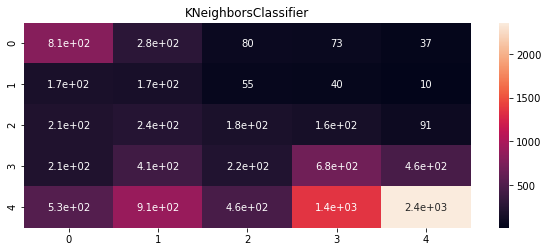

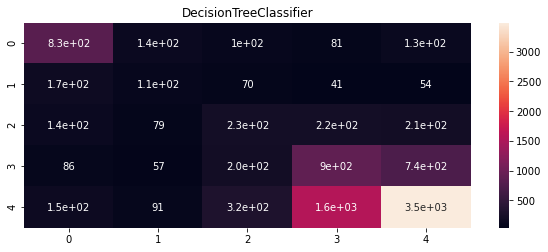

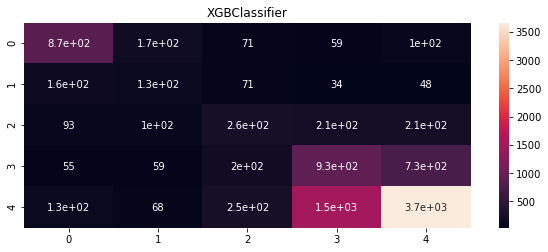

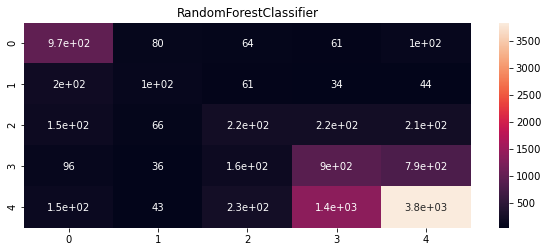

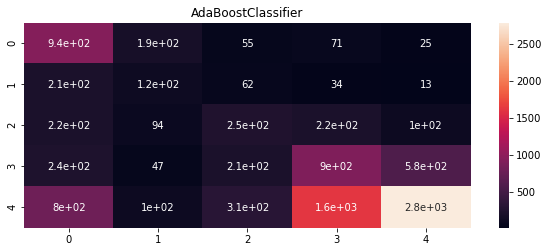

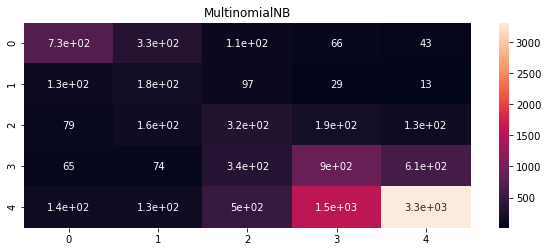

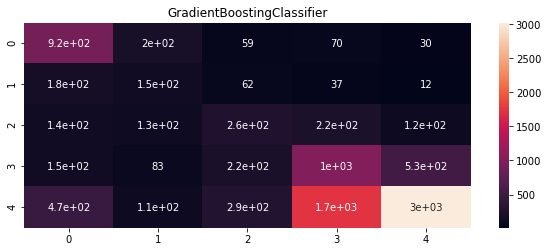

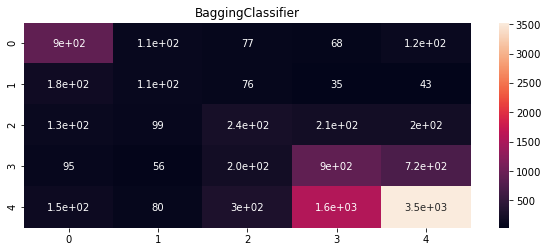

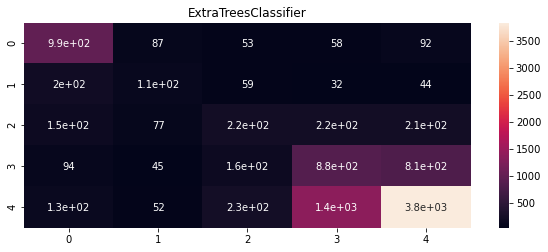

In [39]:
Model= []
score= []
cvs=[]
for name,model in models:
    print('******************************************',name,'********************************************************')
    print('\n')
    Model.append(name)
    model.fit(x_train_ns,y_train_ns)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pre)
    print('Accuracy_score = ',AS)
    score.append(AS*100)
    print('\n')
    sc= cross_val_score(model, x, y, cv=10, scoring='accuracy').mean()
    print('Cross_Val_Score = ',sc)
    cvs.append(sc*100)
    print('\n')
    print('classification_report\n',classification_report(y_test,pre))
    print('\n')
    cm=confusion_matrix(y_test,pre)
    print(cm)
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    print('\n\n')

In [40]:
result = pd.DataFrame({'Model': Model, 'Accuracy_score': score,'Cross_val_score': cvs})
result

,Model,Accuracy_score,Cross_val_score
0,KNeighborsClassifier,41.164934,56.189449
1,DecisionTreeClassifier,54.393018,59.801922
2,XGBClassifier,57.442636,64.634242
3,RandomForestClassifier,59.119435,64.781330
4,AdaBoostClassifier,48.980192,61.406158
5,MultinomialNB,53.304570,62.035693
6,GradientBoostingClassifier,52.539714,63.359482
7,BaggingClassifier,55.697196,62.688763
8,ExtraTreesClassifier,59.109629,64.510688


# Using gridsearch cv to find the best parameters in random forest

In [47]:
from sklearn.model_selection import GridSearchCV

parameters={'max_depth': [80, 90, 100], 'min_samples_leaf': [3, 4, 5], 'min_samples_split': [8, 10, 12], 'n_estimators': [100, 200, 300, 1000]}
rfc=RandomForestClassifier()

clf=GridSearchCV(rfc,parameters,cv=5,n_jobs=-1)
clf.fit(x_train_ns,y_train_ns)
print(clf.best_params_)

{'max_depth': 100, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 1000}


In [48]:
#RandomForesetClassifier with best parameters

rfc=RandomForestClassifier(max_depth=100, min_samples_leaf=3, min_samples_split=8, n_estimators=1000)
rfc.fit(x_train_ns,y_train_ns)
rfc.score(x_train_ns,y_train_ns)
predrfc=rfc.predict(x_test)
print(accuracy_score(y_test,predrfc))
print(confusion_matrix(y_test,predrfc))
print(classification_report(y_test,predrfc))

0.5808982153363405
[[ 922  156   58   58   84]
 [ 184  120   72   31   33]
 [ 109   97  285  209  176]
 [  74   49  213  882  764]
 [ 157   53  263 1434 3715]]
              precision    recall  f1-score   support

           1       0.64      0.72      0.68      1278
           2       0.25      0.27      0.26       440
           3       0.32      0.33      0.32       876
           4       0.34      0.45      0.38      1982
           5       0.78      0.66      0.71      5622

    accuracy                           0.58     10198
   macro avg       0.47      0.49      0.47     10198
weighted avg       0.61      0.58      0.59     10198



In [49]:
result = pd.DataFrame({'Model': Model, 'Accuracy_score': score,'Cross_val_score': cvs})
result

,Model,Accuracy_score,Cross_val_score
0,KNeighborsClassifier,41.164934,56.189449
1,DecisionTreeClassifier,54.393018,59.801922
2,XGBClassifier,57.442636,64.634242
3,RandomForestClassifier,59.119435,64.781330
4,AdaBoostClassifier,48.980192,61.406158
5,MultinomialNB,53.304570,62.035693
6,GradientBoostingClassifier,52.539714,63.359482
7,BaggingClassifier,55.697196,62.688763
8,ExtraTreesClassifier,59.109629,64.510688


# Random forest classifier is giving us best results so we save it as our final model.

In [50]:
#saving our model

import joblib
joblib.dump(RF,'Ratings_prediction.csv')

['Ratings_prediction.csv']

In [51]:
model=joblib.load('Ratings_prediction.csv')

In [52]:
#Testing our model
import sys
nums= model.predict(x_test)
np.set_printoptions(threshold=sys.maxsize)
print(nums)

[4 1 5 2 5 3 3 5 4 4 3 4 5 5 3 5 4 5 1 4 5 1 3 5 5 5 4 4 4 5 1 5 4 5 1 5 5
 5 5 4 4 4 5 4 4 5 5 4 4 3 4 2 2 5 4 4 4 3 5 4 5 5 4 4 5 4 5 5 5 4 4 4 5 5
 1 4 4 1 4 5 5 5 5 4 3 5 1 5 2 5 4 5 3 5 5 5 2 4 4 5 4 3 1 4 3 4 3 5 5 5 4
 4 4 1 4 4 5 4 1 5 4 5 4 2 3 5 5 4 5 4 5 4 4 5 1 4 4 4 5 1 5 4 2 2 5 5 3 5
 2 5 5 3 1 4 5 5 5 4 4 5 2 5 5 5 5 1 5 5 5 4 4 5 5 4 5 5 5 4 3 4 5 4 5 5 5
 5 1 5 5 3 5 5 4 1 4 1 1 3 4 1 5 1 1 4 5 4 4 3 5 1 5 5 5 5 5 1 3 3 5 4 4 5
 4 1 1 3 5 4 1 5 5 4 5 4 4 5 1 3 4 4 5 4 4 4 5 5 5 5 4 5 5 5 1 5 5 3 4 4 4
 5 3 5 5 5 5 5 2 5 4 5 5 5 4 5 4 1 4 5 5 5 5 5 4 5 5 5 4 1 4 1 5 4 1 4 2 3
 4 5 1 1 5 3 3 4 4 5 5 4 5 4 4 5 5 5 4 4 2 1 5 5 5 5 5 1 3 1 5 5 5 5 1 5 5
 3 5 5 1 4 5 5 4 3 5 5 4 5 5 5 5 4 4 5 5 5 3 4 4 4 1 4 5 4 4 5 4 4 3 5 1 1
 5 5 4 4 4 4 5 5 2 1 1 2 5 4 5 3 1 5 5 5 1 5 4 2 5 4 4 1 3 5 5 1 5 4 5 3 5
 5 5 5 4 3 5 5 5 4 5 1 5 5 5 4 4 5 5 1 5 5 4 5 4 5 5 1 5 5 5 4 5 5 1 5 5 1
 5 5 4 5 5 4 5 5 5 3 4 5 4 5 4 3 4 5 5 4 5 5 4 5 3 4 4 5 4 5 4 5 5 1 5 5 3
 5 4 5 2 5 5 1 4 5 1 5 5 